# Recommender Systems

For more information on Recommender systems read Recommender Systems by Jannach and Zanker.

This project will involve looking at data users have rated films and give recommendations for films to watch based on what the user's previously watched films.

In [1]:
import pandas as pd
import numpy as np

In [3]:
column_names = ['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv('u.data',sep = '\t',names=column_names)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Grab the film titles

In [6]:
film_titles = pd.read_csv('Movie_Id_Titles')
film_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Now merge the two dataframes together

In [8]:
df = pd.merge(df,film_titles,on= 'item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [10]:
sb.set_style('white')

In [11]:
#Mean rating by title

df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                                   2.333333
1-900 (1994)                                                2.600000
101 Dalmatians (1996)                                       2.908257
12 Angry Men (1957)                                         4.344000
187 (1997)                                                  3.024390
2 Days in the Valley (1996)                                 3.225806
20,000 Leagues Under the Sea (1954)                         3.500000
2001: A Space Odyssey (1968)                                3.969112
3 Ninjas: High Noon At Mega Mountain (1998)                 1.000000
39 Steps, The (1935)                                        4.050847
8 1/2 (1963)                                                3.815789
8 Heads in a Duffel Bag (1997)                              3.250000
8 Seconds (1994)                                            3.750000
A Chef in Love (1996)                                       4.125000
Above the Rim (1994)        

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [17]:
#for films with the highest rating using mean(), it could be only one person gave these films a 5-star rating
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
#Films with the most ratings using count()
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let's explore the data with some histograms.

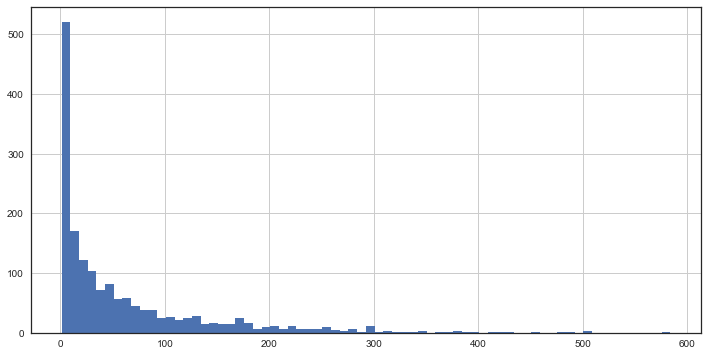

In [23]:
plt.figure(figsize=(12,6))
ratings['number of ratings'].hist(bins=70)

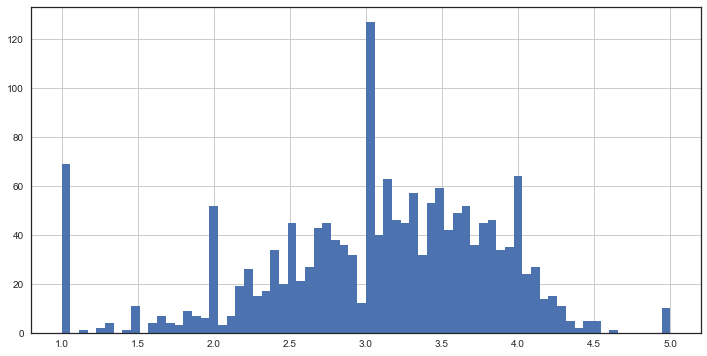

In [24]:
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=70)

Notice peaks at the whole numbers: this is due to viewer giving ratings as whole numbers. You can see the ratings are distributed normally around the 3-star rating. There are also outliers at 1-star or 5-star due to very few people watching those films.

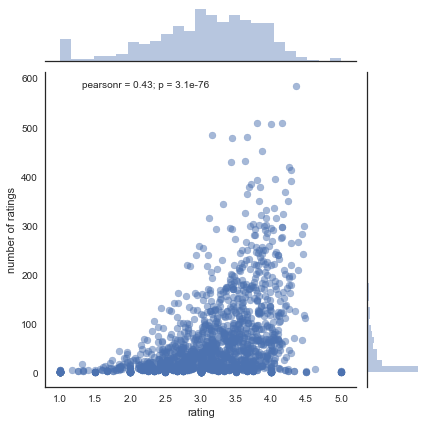

In [27]:
sb.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

From this we can see that the higher the rating, the higher the number of ratings, meaning more people are watching the film and giving it a rating. Notice the outlier at rating of 5.0, most likely there was just one viewer who gave it a 5-star rating.

## Recommending Similar Films

I will create a matrix that has the user id as the index and film titles as the columns. The cells will contain values of ratings the user gave for the film. There are a lot of NaN values because not ever user will have seen all the films.

In [30]:
filmmat = df.pivot_table(index='user_id',columns='title',values='rating')
filmmat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated films:

In [31]:
ratings.sort_values('number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two films: the sci-fi adventure film Star Wars, and animated film Toy Story

In [32]:
starwars_user_rating = filmmat['Star Wars (1977)']
toystory_user_rating = filmmat['Toy Story (1995)']

starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

The corrwith() method will correlate other films with the Star Wars adn Toy Story user ratings.

In [33]:
similar_to_starwars = filmmat.corrwith(starwars_user_rating)
similar_to_toystory = filmmat.corrwith(toystory_user_rating)

C:\Users\Ban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Ban\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


Now let's clean the data by removing NaN values and by using a DataFrame instead of a series.

In [34]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


This dataframe shows the correlation of the user ratings of these films to the user ratings for Star Wars.

Now by sorting the dataframe by correlation, this should give us similar films. However the dataframe doesn't make any sense: this is because there are a number of films viewed once by users who watched Star Wars.

In [36]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


We can filter this by setting the number of ratings as a threshold. Lets say we filter out films with less than 100 reviews. If you look back at the first histogram, the number of reviews drop after 100.

In [37]:
corr_starwars =  corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [39]:
corr_starwars[corr_starwars['number of ratings'] > 100].sort_values('Correlation',ascending=False).head(10)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


This gives us the top 10 films sorted by Correlation with the number of ratings above 100. The recommender system recommends users who rated Star Wars highly would be interested in Empire Strikes Back and Return of the Jedi (two films of the original Star Wars trilogy). 

Raider of the Lost Ark is forth (0.536 correlation) since it is an adventure film; viewer who watch Star Wars would be interested in Raiders. Austin Powers is fifth because it is a popular comedy film but notice the significant drop in correlation to 0.377. Hence the Austin Powers film would be a recommended film for those who viewed Star Wars.

Lets do the same thing with Toy Story.

In [42]:
# Toy Story

corr_toystory = pd.DataFrame(similar_to_toystory,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings['number of ratings'])
corr_toystory[corr_toystory['number of ratings'] > 100].sort_values('Correlation',ascending=False).head(10)

,Correlation,number of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129
